<head>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;500;700&display=swap" rel="stylesheet">
  <style>
    body {
      background-color: #f5f5f5;
      color: #333;
      padding: 40px;
      font-family: 'Roboto', sans-serif;
      text-align: left;
    }
    .container {
      width: 600px;
      margin: 20px 0;
    }
    .icon {
      margin-right: 10px;
      vertical-align: middle;
    }
    .spacer {
      margin-top: 40px;
    }
  </style>
</head>
<body>

  <!-- Title Section -->
  <div class="container">
    <h1 style="margin: 0; font-size: 36px; letter-spacing: 1.5px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/brain.png" width="40" class="icon">Clustering Techniques
    </h1>
  </div>

  <!-- University Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/university.png" width="30" class="icon">University
    </h2><br>
    <div style="display: flex; align-items: center;">
      <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width="60px" style="margin-right: 10px;">
      <span style="font-size: 18px;">University of Tehran</span>
    </div>
  </div>

  <!-- Student Info Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/student-male.png" width="30" class="icon">Student Info
    </h2>
    <span style="font-size: 18px;">Name : Amirhossein</span><br>
    <span style="font-size: 18px;">Last Name : Arefzadeh</span><br>
    <span style="font-size: 18px;">SID : 810101604</span>
  </div>

  <!-- Description Section -->
  <div class="container">
    <h2 style="font-size: 24px; margin-bottom: 10px;">
      <img src="https://img.icons8.com/ios-filled/50/0077b6/info.png" width="30" class="icon">Project Overview
    </h2>
    <p style="font-size: 18px; line-height: 1.6;">
    The project focuses on evaluating clustering algorithms like K-Means, DBSCAN, and Hierarchical Clustering. 
    Using PCA for dimensionality reduction, the project visualizes high-dimensional data and assesses clustering performance with metrics such as Silhouette and Homogeneity scores. The goal is to compare techniques and identify the most effective approach for creating meaningful clusters in any dataset.
    </p>
  </div>
  
</body>


## 📚 Import Required Libraries

In this section, we import the necessary libraries to enable the required functionalities and operations for the project.

In [1]:
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## 📁Google Colab Setup

This code mounts Google Drive in a Colab environment, sets a specific directory path in the user's Google Drive, changes the working directory to that path, and then lists the files in that directory.

In [2]:
drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'AI/CA5'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
os.chdir(GOOGLE_DRIVE_PATH)
print(os.listdir('./'))

Mounted at /content/drive
['dataset.csv', 'nltk_data', 'cleaned_dataset.csv', 'clustered_data.csv', 'clustring.ipynb']


## 🧹 Data Preprocessing  
 In this section, we perform data preprocessing to clean, transform, and prepare the dataset for analysis or modeling.

### 📥 Load Dataset  
In this subsection, we load the dataset as a pandas dataframe 🐼

In [3]:
dataset_path = './data/articles.csv'
data = pd.read_csv(dataset_path)

### 🔎 Data Overview
In this subsection, we provide an overview of the dataset, including its structure, features, and key characteristics to understand the data before analysis or modeling.

In [4]:
data.head()

,document
0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...
1,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...
2,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...
3,From: ajs8@kimbark.uchicago.edu (adam jeremy s...
4,From: npm@netcom.com (Nancy P. Milligan)\nSubj...


In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  3897 non-null   object
dtypes: object(1)
memory usage: 30.6+ KB


None

### 💡 preprocessing function

#### 1. Regex Cleaning

Removes unnecessary headers and special characters.

---

#### 2. Lowercasing and Tokenization

Converts text to lowercase and splits it into individual words for further processing.

---

#### 3. Removing Stop Words

Stop words (e.g., "the," "is," "and") are common in text but add little value to clustering. Removing them reduces noise.

- Use a library like `nltk` or `spaCy` to remove stop words automatically.

---

#### 4. Stemming or Lemmatization

- Stemming reduces words to their base form (e.g., "running" → "run"), but it may result in incomplete words.

- Lemmatization uses linguistic rules to get the root form of a word (e.g., "was" → "be").

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text_nltk(text):

    # delete specific terms
    text = re.sub(r"\b(Subject|subject|Organization|organization|Lines|lines|from|From|to|TO)\b", "", text, flags=re.IGNORECASE)

    # delete special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize text
    words = word_tokenize(text.lower())

    # delete stop words and lemmatize
    processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(processed_words)


nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):

    # delete specific terms
    text = re.sub(r"\b(Subject|subject|Organization|organization|Lines|lines|from|From|to|TO)\b", "", text, flags=re.IGNORECASE)

    # delete special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenize and lemmatize with spaCy
    doc = nlp(text.lower())
    processed_words = [token.lemma_ for token in doc if not token.is_stop]

    return " ".join(processed_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### ⚒️ Apply cleaning to the `document`

In [7]:
cleaned_documents = []

for i, document in enumerate(data['document']):
    cleaned_documents.append(preprocess_text_nltk(document))
    if (i + 1) % 500 == 0:
        print(f"Processed {i + 1} documents")

data['cleaned_document'] = cleaned_documents

Processed 500 documents
Processed 1000 documents
Processed 1500 documents
Processed 2000 documents
Processed 2500 documents
Processed 3000 documents
Processed 3500 documents


### 🔬 Display `cleaned_document`

In [8]:
data[['document', 'cleaned_document']].head()

,document,cleaned_document
0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...,melabdelcobracsunmedu mohammed elabdellaoui ct...
1,From: bc744@cleveland.Freenet.Edu (Mark Ira Ka...,bcclevelandfreenetedu mark ira kaufman israel ...
2,From: lundby@rtsg.mot.com (Walter F. Lundby)\n...,lundbyrtsgmotcom walter f lundby msg sensitivi...
3,From: ajs8@kimbark.uchicago.edu (adam jeremy s...,ajskimbarkuchicagoedu adam jeremy schorr graph...
4,From: npm@netcom.com (Nancy P. Milligan)\nSubj...,npmnetcomcom nancy p milligan need advice doct...


### 🗃️ saving cleaned dataset

In this subsection, we save the cleaned dataset for further analysis or modeling.

In [9]:
cleaned_dataset_path = './cleaned_dataset.csv'
data[['cleaned_document']].to_csv(cleaned_dataset_path, index=False)

## ❓ Questions and Answers

### Question 1:
explain the method of replacing words using lemmatization or stemming.

**Answer:**  
Stemming and lemmatization are text preprocessing techniques used to normalize words.  

- **Stemming** reduces a word to its root or base form, often by chopping off prefixes or suffixes. For example, "playing," "played," and "player" may be reduced to "play." However, stemming doesn't guarantee meaningful or grammatically correct base forms ("studies" might become "studi").  

- **Lemmatization** transforms a word into its meaningful base form (lemma) by considering its context and part of speech. For example, "running" becomes "run," and "better" becomes "good." Lemmatization is more accurate than stemming but computationally heavier.

---

### Question 2:
What is the reason for performing preprocessing on a text dataset?

**Answer:**  
Preprocessing prepares raw text data for analysis by cleaning and structuring it. It helps:  

- Remove noise, irrelevant details, and inconsistencies (punctuation, case sensitivity, or stopwords).  

- Normalize the data to reduce variability (through stemming or lemmatization).  

- Improve the performance of text analysis models, such as classification or clustering. Preprocessing ensures that models focus on meaningful patterns rather than irrelevant variations in the text.

---

### Question 3:
What is the purpose of feature extraction? Why don’t we only rely on reading textual data?

**Answer:**  
Feature extraction converts raw text data into numerical or structured representations suitable for machine learning algorithms. This step is essential because:

- Machine learning models cannot process raw text directly; they require numerical inputs.

- Features capture meaningful information (like word frequency, sentiment, or topic distribution) from the text, which helps models understand and classify it.  
Relying solely on raw text would result in poor model performance due to the unstructured nature of textual data. Feature extraction enables the system to focus on relevant aspects of the data.

## 🔬 Extract Features

Extract Features using SentenceTransformers

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

# make embeddings for the cleaned documents
embeddings = model.encode(data['cleaned_document'], show_progress_bar=True)

embeddings = np.array(embeddings)

## 🚀 Perform Clustering

### K-Means Clustering

#### Determine the optimal number of clusters using the elbow method

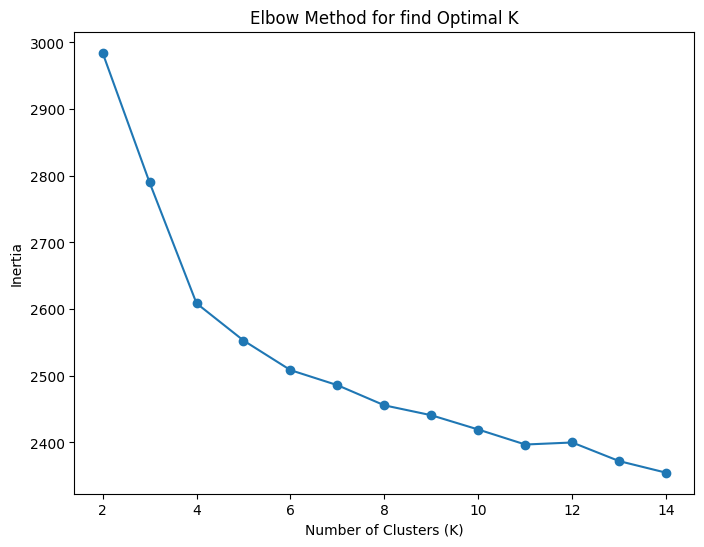

In [11]:
inertia = []
k_range = range(2, 15)  #different values for K

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

#### Choose the optimal K based on the elbow point

In [12]:
optimal_k = 4 # based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(embeddings)

#### Silhouette score for K-Means

In [13]:
kmeans_score = silhouette_score(embeddings, data['kmeans_cluster'])
print(f"K-Means Silhouette Score: {kmeans_score}")

K-Means Silhouette Score: 0.10497045516967773


### DBSCAN Clustering

#### appropriate eps

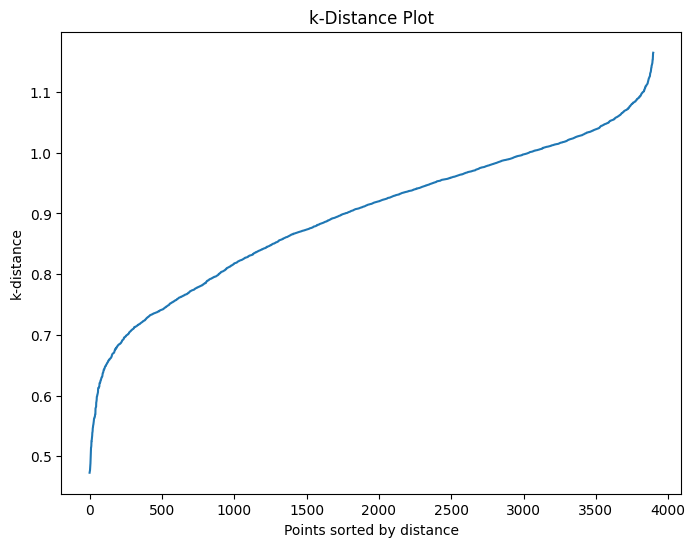

In [14]:
k = 10  # Same as min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = nearest_neighbors.fit(embeddings)
distances, indices = neighbors_fit.kneighbors(embeddings)

# Sort distances
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.show()

# Look for the elbow in the plot to set an eps

In [15]:
# Use cosine similarity for distance measurement
distance_matrix = cosine_distances(embeddings)

# Fit DBSCAN model
dbscan = DBSCAN(metric='precomputed', eps=0.6, min_samples=10)
data['dbscan_cluster'] = dbscan.fit_predict(distance_matrix)


#### Silhouette score for DBSCAN

In [16]:
clusters = data['dbscan_cluster']

dbscan_score = silhouette_score(embeddings, clusters)
print(f"DBSCAN Silhouette Score: {dbscan_score}")

DBSCAN Silhouette Score: 0.049829740077257156


### Hierarchical Clustering

#### Determine the threshold

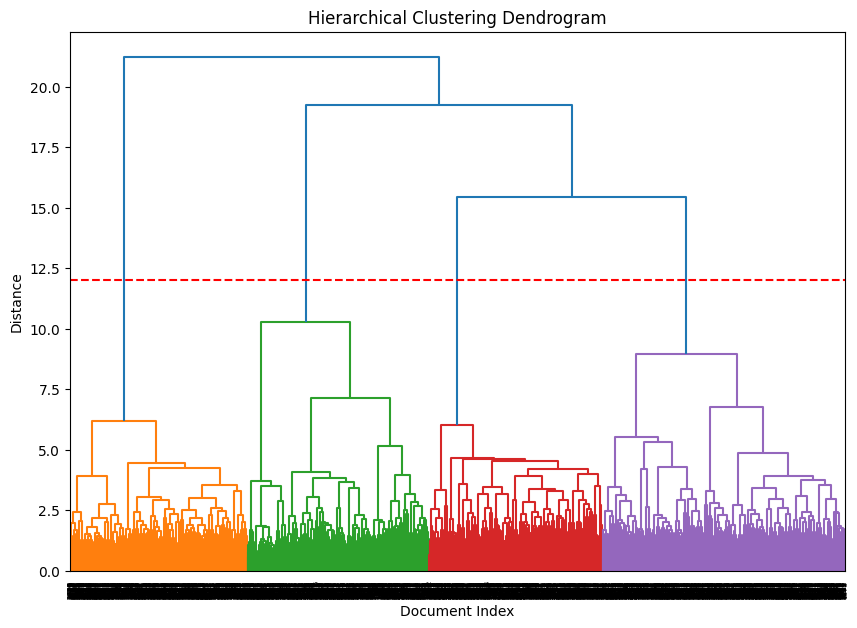

In [17]:
linkage_matrix = linkage(embeddings, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Document Index')
plt.ylabel('Distance')
plt.axhline(y=12, color='r', linestyle='--')  # threshold
plt.show()

#### Assign cluster labels

In [18]:
# Assign cluster labels based on threshold we find
data['hierarchical_cluster'] = fcluster(linkage_matrix, t=12, criterion='distance')

#### Silhouette score for hierarchical

In [19]:
hierarchical_score = silhouette_score(embeddings, data['hierarchical_cluster'])
print(f"K-Means Silhouette Score: {hierarchical_score}")

K-Means Silhouette Score: 0.09969274699687958


### Save Results

In [20]:
data.to_csv('clustered_data.csv', index=False)

## ❓ Questions and Answers

### Question 4:
Explain supervised and unsupervised learning methods and compare these two methods.

**Answer:**  
- **Supervised Learning:** In supervised learning, the model is trained on labeled data, where each input has a corresponding output. Examples include decision trees, support vector machines (SVM), and neural networks.

- **Unsupervised Learning:** In unsupervised learning, the model tries to find patterns and relationships in data without labeled outputs. Examples include k-means clustering, hierarchical clustering, and DBSCAN.

**Comparison:**

- **Data Requirement:** Supervised requires labeled data, while unsupervised does not.

- **Applications:** Supervised is used for classification and regression, while unsupervised is used for clustering and dimensionality reduction.

- **Accuracy:** Supervised models often provide higher accuracy due to labeled guidance.

---

### Question 5:
Explain the reason for using a feature vector and its characteristics.

**Answer:**  
A feature vector is used to represent data points numerically, making it easier for machine learning models to process and analyze data.

**Characteristics:**

- **Dimensionality:** Number of features.

- **Sparsity:** How many elements are non-zero.

- **Scalability:** How well the vector handles large datasets.

- **Representation:** Should capture the key patterns and variations of the data.

---

### Question 6:
Briefly explain the Sentence Transformer model and the all-MiniLM-L6-v2 model.

**Answer:**

**Sentence Transformer:**

- **Purpose:** Generates numerical sentence embeddings for tasks like clustering and similarity detection.

- **How it Works:** Uses transformer models (e.g., BERT) to convert sentences into dense vectors for comparison.

**all-MiniLM-L6-v2:**

- **What it is:** A smaller, faster version of Sentence Transformer with 6 transformer layers.

- **Use Case:** Ideal for real-time tasks with limited resources while maintaining good accuracy.

**Key Difference:**

- **Sentence Transformer:** Larger, more accurate but slower.

- **all-MiniLM-L6-v2:** Smaller, faster, slightly less accurate.

---

### Question 7:
Explain the K-means, DBSCAN, and Hierarchical Clustering methods, their working principles, advantages, and disadvantages.

**Answer:**

**K-means:** A centroid-based clustering algorithm that partitions data into \(k\) clusters.

- **Advantages:** Simple, efficient for spherical clusters.

- **Disadvantages:** Sensitive to outliers, needs predefined \(k\).

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

- **Advantages:** Detects clusters of arbitrary shape, handles noise well.

- **Disadvantages:** Struggles with varying densities.

**Hierarchical Clustering:** Builds a tree of clusters based on data similarity.

- **Advantages:** No need to predefine the number of clusters.

- **Disadvantages:** Computationally expensive for large datasets.

---

### Question 8:
Explain the elbow method in the K-means algorithm.

**Answer:**

The **elbow method** helps determine the optimal number of clusters for K-means. It plots the within-cluster sum of squares (WCSS) against the number of clusters. The optimal number of clusters is where the "elbow" occurs, indicating diminishing returns in reducing variance.

---

### Question 9:
Compare the output of these three clustering methods. Which method provides the best result for this dataset? Why?

**Answer:**  

Based on the **Silhouette Score**, the order of clustering performance is:  

**K-means > Hierarchical Clustering > DBSCAN**.

**Explanation:**

- **K-means:** Achieved the highest Silhouette Score, indicating well-separated and compact clusters. It works well when clusters are spherical and balanced, which seems to be the case in this dataset.  

- **Hierarchical Clustering:** Slightly lower score, often due to its sensitivity to outliers and the way it merges clusters. However, it still performed reasonably well.  

- **DBSCAN:** Had the lowest score, as it is more suited for datasets with varying densities and non-spherical clusters. Its lower score suggests it struggled with the structure of this dataset.  

**Conclusion:**

**K-means** performed best because the dataset likely has spherical, evenly distributed clusters, which aligns well with K-means' assumptions.

## 📦 Performing PCA

Performing PCA for Dimensionality Reduction and Clustering

### PCA Implementation with sklearn

We'll apply PCA to reduce the dimensions of the extracted features and then visualize the reduced features. Finally, we'll use the reduced features for clustering.

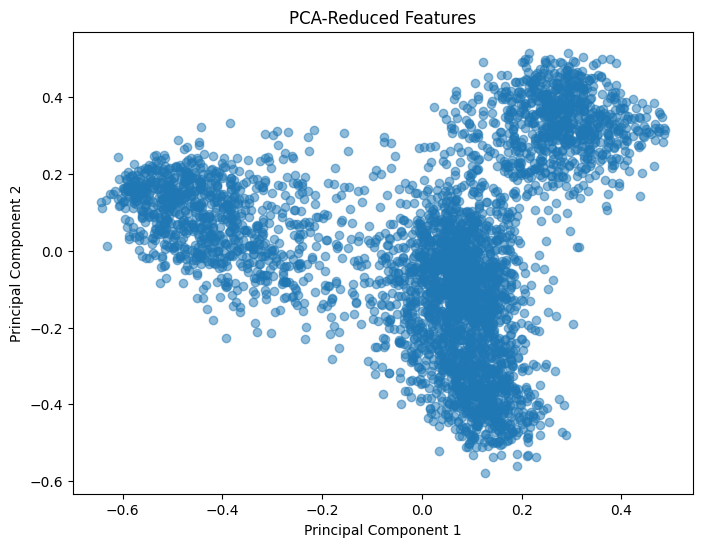

In [21]:
# reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.5)
plt.title('PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## ❓ Questions and Answers

### Question 10:
Research PCA and briefly explain how it works.

**Answer:**  

**Principal Component Analysis (PCA)** is a dimensionality reduction technique commonly used in data analysis and machine learning. It works by transforming the original dataset into a new coordinate system where the data is represented using fewer dimensions while preserving the maximum variance.

**Steps of PCA:**

1. **Standardize the Data:** Ensure all features have zero mean and unit variance.  

2. **Compute the Covariance Matrix:** Measure how different features vary together.  

3. **Eigen Decomposition:** Calculate the eigenvalues and eigenvectors of the covariance matrix.  

4. **Select Principal Components:** Choose the top eigenvectors based on the highest eigenvalues.  

5. **Transform Data:** Project the data onto the selected principal components.  

PCA helps in visualizing high-dimensional data, removing noise, and reducing computation for algorithms.

## 🧪 Evaluation

Using the reduced features, perform clustering and compare results across different algorithms. We will calculate **silhouette scores** for the clustering methods.

**Silhouette Score**

Silhouette score measures how similar a point is to its cluster compared to other clusters. It ranges from -1 (poor clustering) to 1 (ideal clustering). For methods without ground truth, we calculate the silhouette score.

**Homogeneity**

Homogeneity measures how well the clusters contain only data points from a single class (if ground truth is available). It ranges from 0 (worst) to 1 (best).

### K-Means Clustering

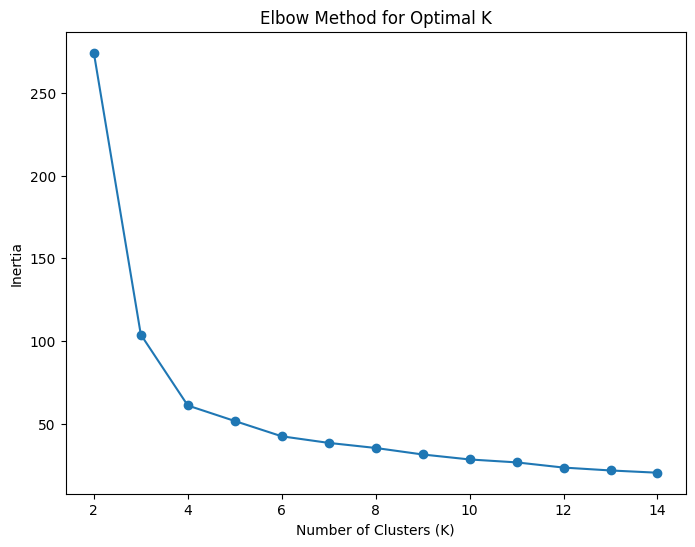

In [22]:
inertia = []
k_range = range(2, 15)  #Test different values for K

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

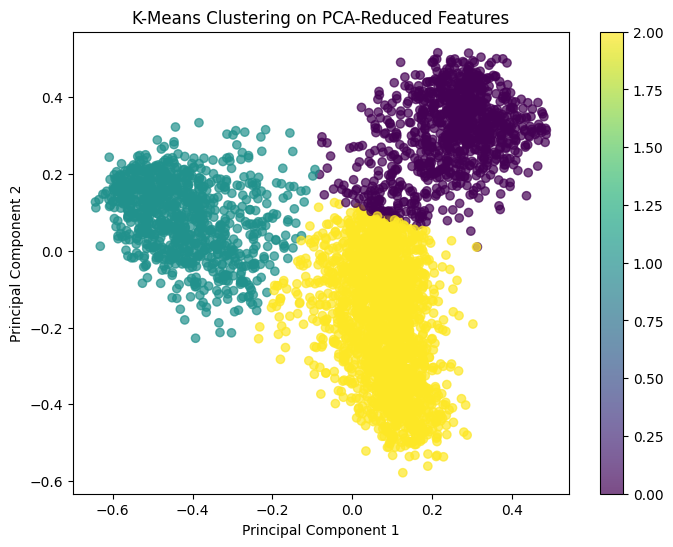

K-Means Silhouette Score (PCA-Reduced Features): 0.5971007347106934


In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['pca_kmeans_cluster'] = kmeans.fit_predict(reduced_features)

plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_features[:, 0], reduced_features[:, 1],
    c=data['pca_kmeans_cluster'], cmap='viridis', alpha=0.7
)
plt.title('K-Means Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

kmeans_score = silhouette_score(reduced_features, data['pca_kmeans_cluster'])
print(f"K-Means Silhouette Score (PCA-Reduced Features): {kmeans_score}")

In [24]:
kmeans_clusters = data['pca_kmeans_cluster'].unique()
sampled_data = data.groupby('pca_kmeans_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)
sampled_data[['pca_kmeans_cluster', 'document']]

<ipython-input-24-87d8b927f94e>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('pca_kmeans_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)


,pca_kmeans_cluster,document
0,0,From: raffi@watnxt08.ucr.edu (Raffi R Kojian)\...
1,0,From: dbd@urartu.sdpa.org (David Davidian)\nSu...
2,0,From: flax@frej.teknikum.uu.se (Jonas Flygare)...
3,1,From: west@esd.dl.nec.com (Mike West)\nSubject...
4,1,From: tedward@cs.cornell.edu (Edward [Ted] Fis...
5,1,Organization: University of Notre Dame - Offic...
6,2,Subject: Re: Trying to view POV files.....\nFr...
7,2,From: jgreen@amber (Joe Green)\nSubject: Re: W...
8,2,From: powlesla@acs.ucalgary.ca (Jim Powlesland...


### DBSCAN Clustering

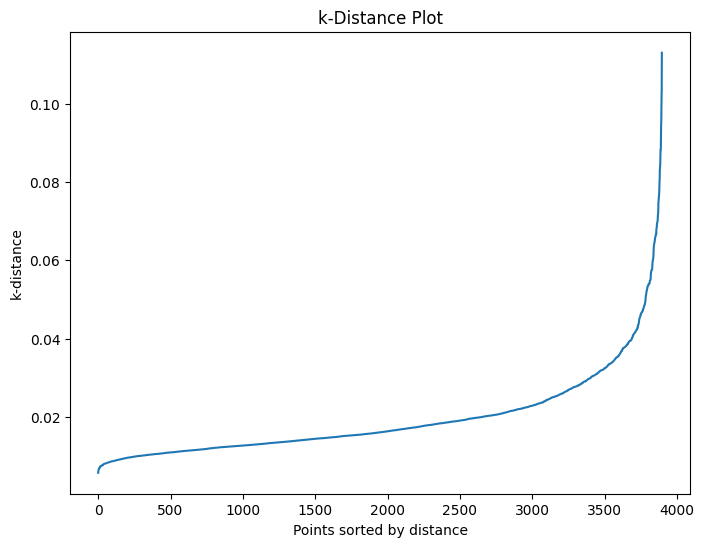

In [25]:
k = 10  # Same as min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = nearest_neighbors.fit(reduced_features)
distances, indices = neighbors_fit.kneighbors(reduced_features)

# Sort distances
distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.show()

# Look for the elbow in the plot to set an appropriate eps

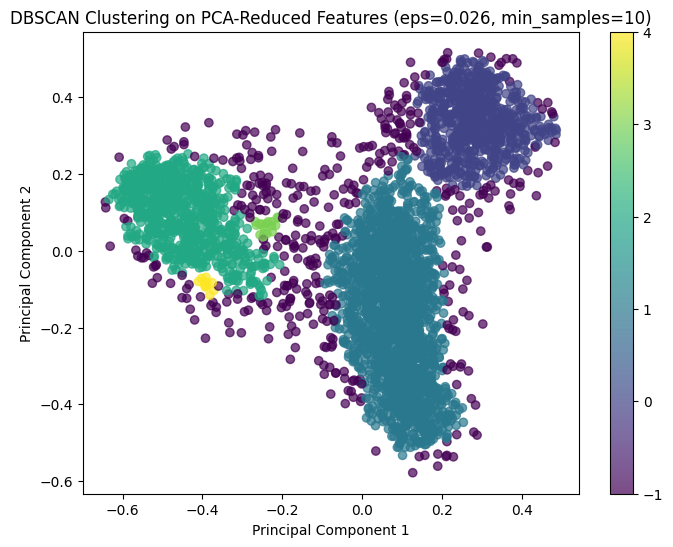

DBSCAN Silhouette Score (PCA-Reduced Features): 0.32594239711761475


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

eps = 0.026
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(reduced_features)

data['pca_dbscan_cluster'] = clusters

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    reduced_features[:, 0], reduced_features[:, 1],
    c=data['pca_dbscan_cluster'], cmap='viridis', alpha=0.7
)
plt.title(f'DBSCAN Clustering on PCA-Reduced Features (eps={eps}, min_samples={min_samples})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Check if DBSCAN created at least two clusters
unique_labels = len(set(clusters)) - (1 if -1 in clusters else 0)
if unique_labels > 1:
    dbscan_score = silhouette_score(reduced_features, clusters)
    print(f"DBSCAN Silhouette Score (PCA-Reduced Features): {dbscan_score}")
else:
    print("DBSCAN did not find enough clusters to calculate a Silhouette Score.")


In [27]:
dbscan_clusters = data['pca_dbscan_cluster'].unique()
sampled_data = data.groupby('pca_dbscan_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)
sampled_data[['pca_dbscan_cluster', 'document']]

<ipython-input-27-47e939cf1c51>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('pca_dbscan_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)


,pca_dbscan_cluster,document
0,-1,From: tknuth@bio.ri.ccf.org (Todd Knuth)\nSubj...
1,-1,From: oaf@zurich.ai.mit.edu (Oded Feingold)\nS...
2,-1,From: oaf@zurich.ai.mit.edu (Oded Feingold)\nS...
3,0,From: melabdel@cobra.cs.unm.edu (Mohammed Elab...
4,0,From: sera@zuma.UUCP (Serdar Argic)\nSubject: ...
5,0,From: shaig@Think.COM (Shai Guday)\nSubject: R...
6,1,From: jtheinon@klaava.Helsinki.FI (Jarkko Tapi...
7,1,From: aron@tikal.ced.berkeley.edu (Aron Bonar)...
8,1,From: kxgst1+@pitt.edu (Kenneth Gilbert)\nSubj...
9,2,From: kmelcher@rafael.Arco.COM (Kenneth Melche...


### Hierarchical Clustering

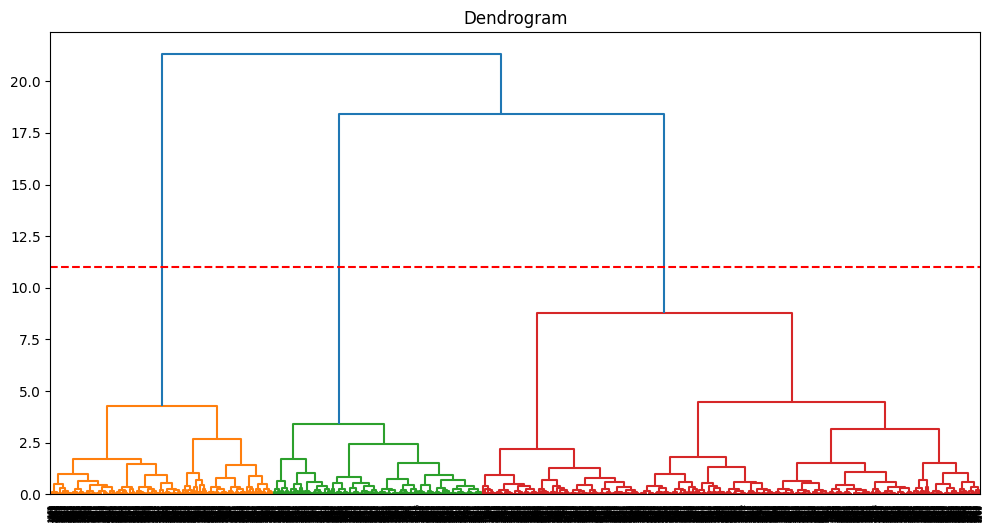

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(reduced_features, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.axhline(y=11, color='r', linestyle='--')  # threshold
plt.title('Dendrogram')
plt.show()


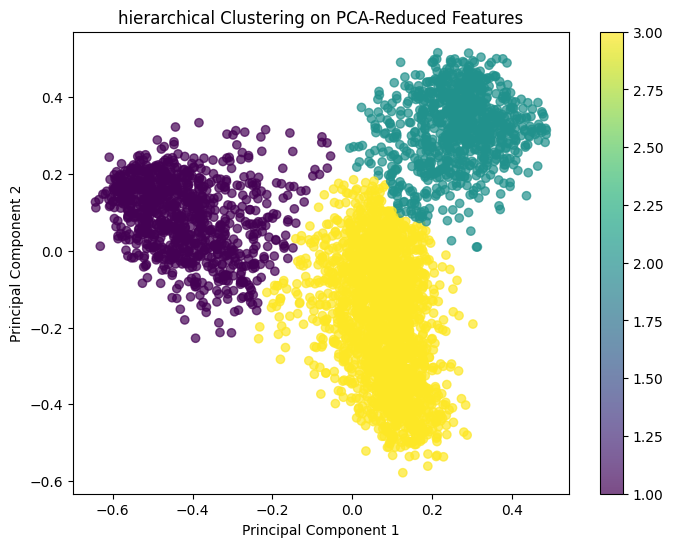

hierarchical Silhouette Score (PCA-Reduced Features): 0.5987672209739685


In [29]:
linkage_matrix = linkage(reduced_features, method='ward')
data['pca_hierarchical_cluster'] = fcluster(linkage_matrix, t=11, criterion='distance')

plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_features[:, 0], reduced_features[:, 1],
    c=data['pca_hierarchical_cluster'], cmap='viridis', alpha=0.7
)
plt.title('hierarchical Clustering on PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

kmeans_score = silhouette_score(reduced_features, data['pca_hierarchical_cluster'])
print(f"hierarchical Silhouette Score (PCA-Reduced Features): {kmeans_score}")

In [30]:
dbscan_clusters = data['pca_hierarchical_cluster'].unique()
sampled_data = data.groupby('pca_hierarchical_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)
sampled_data[['pca_hierarchical_cluster', 'document']]

<ipython-input-30-8a68cfc80690>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('pca_hierarchical_cluster').apply(lambda x: x.sample(3, random_state=30)).reset_index(drop=True)


,pca_hierarchical_cluster,document
0,1,From: jdl6@po.CWRU.Edu (Justin D. Lowe)\nSubje...
1,1,From: k_mullin@oz.plymouth.edu (Mully)\nSubjec...
2,1,From: mjones@watson.ibm.com (Mike Jones)\nSubj...
3,2,From: bradski@retina.bu.edu (Gary Bradski)\nSu...
4,2,From: eyad@dbrus.Unify.Com (Eyad Alnuweiri)\nS...
5,2,From: dbd@urartu.sdpa.org (David Davidian)\nSu...
6,3,From: banschbach@vms.ocom.okstate.edu\nSubject...
7,3,From: anderge@stein.u.washington.edu (Geoff An...
8,3,From: nfotis@ntua.gr (Nick C. Fotis)\nSubject:...
